In [62]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family':'Times New Roman'})
import seaborn as sns
import pandas as pd
import numpy as np

In [63]:
dframe = pd.read_csv('dframe_jobs_processed.csv', sep='|', encoding='UTF-16')
dframe['responsabilities_and_other_details'] = (dframe['job_main_responsabilities_pt_processed'] + dframe['job_other_details_pt_processed']).str.strip()

In [64]:
dframe.head()

,company_name,job_area,job_link,job_extraction_timestamp,job_title,job_location,job_main_responsabilities,job_other_details,job_main_responsabilities_lang,job_other_details_lang,job_main_responsabilities_pt,job_other_details_pt,job_main_responsabilities_pt_processed,job_other_details_pt_processed,job_title_type,Macro_job_area,responsabilities_and_other_details
0,99,Finance,https://carreiras.99app.com/jobdetail/?vagaid=...,2021-06-27 11:38:13.363,Finance and Planning Manager,Brazil,-Detailed analysis of P&L variances versus for...,"- Strong expertise managing budget, forecast, ...",en,en,-Análise detalhada das variações de P&L versus...,- Forte experiência em gerenciamento de orçame...,análise detalhada das variações de p&l versus ...,forte experiência em gerenciamento de orçament...,management_manager,Finance & Legal,análise detalhada das variações de p&l versus ...
1,99,Finance,https://carreiras.99app.com/jobdetail/?vagaid=...,2021-06-27 11:42:08.465,Finance Business Partner,Colombia,Evaluate the end to end financial process for ...,"University graduate in the domain of Finance, ...",en,en,Avalie o processo financeiro de ponta a ponta ...,Graduação universitária no domínio de Finanças...,avalie o processo financeiro de ponta a ponta ...,graduação universitária no domínio de finanças...,business_partner,Finance & Legal,avalie o processo financeiro de ponta a ponta ...
2,99,Finance,https://carreiras.99app.com/jobdetail/?vagaid=...,2021-06-27 11:44:29.556,Finance Manager,Mexico,"1. Financial Budget, Forecast, Closing, ...",The successful applicant:\nUniversity graduate...,en,en,"1. Orçamento Financeiro, Previsão, Fechamento,...",O candidato bem-sucedido: Graduado universitár...,1 orçamento financeiro previsão fechamento con...,o candidato bemsucedido: graduado universitári...,management_manager,Finance & Legal,1 orçamento financeiro previsão fechamento con...
3,99,Finance,https://carreiras.99app.com/jobdetail/?vagaid=...,2021-06-27 11:46:47.127,Finance Manager FP&A,Mexico,"1. Financial Budget, Forecast, Closing, ...","University graduate in Finance, Commerce or En...",en,en,"1. Orçamento Financeiro, Forecast, Fechamento,...","Graduação universitária em Finanças, Comércio ...",1 orçamento financeiro forecast fechamento con...,graduação universitária em finanças comércio o...,management_manager,Finance & Legal,1 orçamento financeiro forecast fechamento con...
4,99,Finance,https://carreiras.99app.com/jobdetail/?vagaid=...,2021-06-27 11:49:03.129,Finance Senior Manager,Mexico,"1. Financial Budget, Forecast, Closing, ...","University graduate in the domain of Finance, ...",en,en,"1. Orçamento Financeiro, Previsão, Fechamento,...","Graduado universitário no domínio de Finanças,...",1 orçamento financeiro previsão fechamento con...,graduado universitário no domínio de finanças ...,management_manager,Finance & Legal,1 orçamento financeiro previsão fechamento con...


Let's start plotting!

In [65]:
dframe_location_and_language = dframe.groupby(['job_location'],as_index=False)['job_extraction_timestamp'].count()
dframe_location_and_language.columns = ['Location','Qty']
dframe_location_and_language = dframe_location_and_language.sort_values('Qty',ascending=True).reset_index()[['Location','Qty']]

In [66]:
dframe_location_and_language

,Location,Qty
0,Chile,1
1,Portugal,1
2,Russia,1
3,United States,1
4,Japan,2
5,Colombia,3
6,Brazil or Remote,4
7,Mexico,11
8,Brazil,76


In [67]:
dframe_location_and_language = dframe_location_and_language.assign(Location_pt = ['Chile','Portugal','Rússia','Estados Unidos', 'Japão', 'Colômbia','Brasil ou Remoto','México','Brasil'])

In [68]:
dframe_location_and_language

,Location,Qty,Location_pt
0,Chile,1,Chile
1,Portugal,1,Portugal
2,Russia,1,Rússia
3,United States,1,Estados Unidos
4,Japan,2,Japão
5,Colombia,3,Colômbia
6,Brazil or Remote,4,Brasil ou Remoto
7,Mexico,11,México
8,Brazil,76,Brasil


In [69]:
dframe_job_title_type = dframe.groupby(['job_title_type'],as_index=False)['job_extraction_timestamp'].count()
dframe_job_title_type.columns = ['Job Title Type','Qty']
dframe_job_title_type = dframe_job_title_type.sort_values('Qty',ascending=True).reset_index()

In [70]:
dframe_job_title_type

,index,Job Title Type,Qty
0,0,business_partner,1
1,2,management_controller,1
2,4,management_director,1
3,5,management_head,1
4,1,intern/assistant,5
5,3,management_coord,6
6,10,specialist,9
7,8,operational_PL,13
8,6,management_manager,19
9,9,operational_SR,21


In [71]:
dframe_job_title_type = dframe_job_title_type.assign(Tipo_vaga = ['Business Partner - RH', 
                                                                    'Gestão - Controller', 
                                                                    'Gestão - Diretor', 
                                                                    'Gestão - Head', 
                                                                    'Estágio/Assistente', 
                                                                    'Gestão - Coodernador',
                                                                    'Especialista',
                                                                    'Operacional - Nível Pleno',
                                                                    'Gestão - Gerente',
                                                                    'Operacional - Nível Sênior',
                                                                    'Operacional - Nível Júnior'])

In [72]:
dframe_job_title_type

,index,Job Title Type,Qty,Tipo_vaga
0,0,business_partner,1,Business Partner - RH
1,2,management_controller,1,Gestão - Controller
2,4,management_director,1,Gestão - Diretor
3,5,management_head,1,Gestão - Head
4,1,intern/assistant,5,Estágio/Assistente
5,3,management_coord,6,Gestão - Coodernador
6,10,specialist,9,Especialista
7,8,operational_PL,13,Operacional - Nível Pleno
8,6,management_manager,19,Gestão - Gerente
9,9,operational_SR,21,Operacional - Nível Sênior


In [73]:
dframe_job_lang = dframe.groupby(['job_main_responsabilities_lang'],as_index=False)['job_extraction_timestamp'].count()
dframe_job_lang.columns = ['Language of the job posted','Qty']
dframe_job_lang = dframe_job_lang.sort_values('Qty',ascending=False).reset_index()

In [74]:
dframe_job_lang

,index,Language of the job posted,Qty
0,2,pt,58
1,0,en,41
2,1,es,1


In [75]:
dframe_macro_job_area = dframe.groupby(['Macro_job_area'],as_index=False)['job_extraction_timestamp'].count()
dframe_macro_job_area.columns = ['Macro Job Area','Qty']
dframe_macro_job_area = dframe_macro_job_area.sort_values('Qty',ascending=True).reset_index()

In [76]:
dframe_macro_job_area

,index,Macro Job Area,Qty
0,1,Accounts Receivable,1
1,7,Treasury,1
2,3,Credit,3
3,5,Fraud & Investigation,4
4,6,Taxes,5
5,2,"Audit, Risk & Compliance",9
6,0,"Accounting, Controllership & FP&A",15
7,4,Finance & Legal,62


In [77]:
dframe_macro_job_area = dframe_macro_job_area.assign(Área_macro_vaga = ['Contas a Receber',
                                                                        'Tesouraria',
                                                                        'Crédito',
                                                                        'Fraude & Investigações',
                                                                        'Fiscal',
                                                                        'Auditoria, Risco & Compliance',
                                                                        'Contabilidade, Controladoria e FP&A',
                                                                        'Financeiro'])

In [78]:
dframe_macro_job_area

,index,Macro Job Area,Qty,Área_macro_vaga
0,1,Accounts Receivable,1,Contas a Receber
1,7,Treasury,1,Tesouraria
2,3,Credit,3,Crédito
3,5,Fraud & Investigation,4,Fraude & Investigações
4,6,Taxes,5,Fiscal
5,2,"Audit, Risk & Compliance",9,"Auditoria, Risco & Compliance"
6,0,"Accounting, Controllership & FP&A",15,"Contabilidade, Controladoria e FP&A"
7,4,Finance & Legal,62,Financeiro


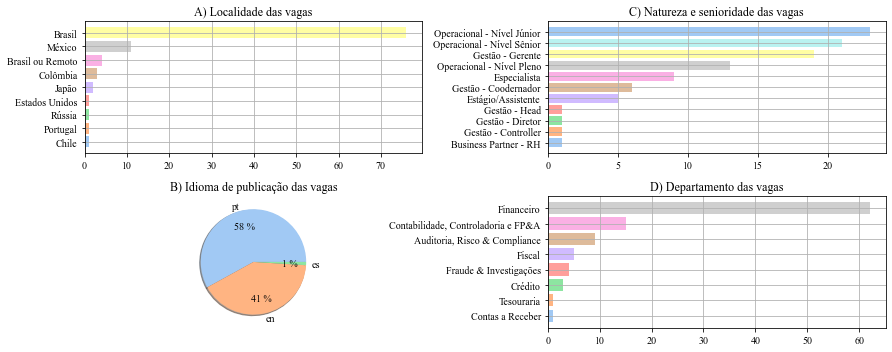

In [79]:
#Plotting all charts together
colors = sns.color_palette('pastel')
fig, ax = plt.subplots(2,2, figsize=(12.5,5))
ax[0,0].barh(dframe_location_and_language['Location_pt'], dframe_location_and_language['Qty'], color=colors)
ax[0,0].title.set_text('A) Localidade das vagas')
ax[1,0].pie(dframe_job_lang['Qty'], labels=dframe_job_lang['Language of the job posted'], pctdistance=.7, autopct='%.0f %%',
          colors=colors, shadow=True)
ax[1,0].title.set_text('B) Idioma de publicação das vagas')
ax[0,1].barh(dframe_job_title_type['Tipo_vaga'], dframe_job_title_type['Qty'], color=colors)
ax[0,1].title.set_text('C) Natureza e senioridade das vagas')
ax[1,1].barh(dframe_macro_job_area['Área_macro_vaga'], dframe_macro_job_area['Qty'], color=colors)
ax[1,1].title.set_text('D) Departamento das vagas')

plt.tight_layout()
ax[0,0].grid()
ax[0,1].grid()
ax[1,1].grid()
plt.savefig('Descriptive Charts_pt.png')
plt.show()

In [80]:
dframe_tech_skills = pd.read_excel('glossary_tech_manually_reviewed.xlsx', sheet_name='glossary_tech_processed_final')
dframe_tech_skills['skill_pt_processed_len'] = dframe_tech_skills['skill_pt_processed'].apply(lambda x: len(x.strip()))
dframe_tech_skills['skill_pt_processed'] = dframe_tech_skills['skill_pt_processed'].apply(lambda x: x.strip())

In [81]:
dframe_tech_skills.groupby(by=['category_en'], as_index=False)['skill_en'].count()

,category_en,skill_en
0,Back-end Technologies Python,26
1,Data Science,109
2,Databases,86
3,Development Methodologies,19
4,Project Management,26
5,Tools,200


In [82]:
# For each IT skill, every term is splitted into single words, then all duplicates are removed, eg. apache avro & apache flink became only three single words 'apache', 'avro', and 'flink'
""" bag_of_words_back_end_tech_python = list(dict.fromkeys([word for line in dframe_tech_skills.query("category_en=='Back-end Technologies Python'")['skill_pt_processed'].str.strip().to_list() for word in line.split()]))
bag_of_words_data_science = list(dict.fromkeys([word for line in dframe_tech_skills.query("category_en=='Data Science'")['skill_pt_processed'].str.strip().to_list() for word in line.split()]))
bag_of_words_databases = list(dict.fromkeys([word for line in dframe_tech_skills.query("category_en=='Databases'")['skill_pt_processed'].str.strip().to_list() for word in line.split()]))
bag_of_words_dev_metho = list(dict.fromkeys([word for line in dframe_tech_skills.query("category_en=='Development Methodologies'")['skill_pt_processed'].str.strip().to_list() for word in line.split()]))
bag_of_words_proj_manag = list(dict.fromkeys([word for line in dframe_tech_skills.query("category_en=='Project Management'")['skill_pt_processed'].str.strip().to_list() for word in line.split()]))
bag_of_words_tools = list(dict.fromkeys([word for line in dframe_tech_skills.query("category_en=='Tools'")['skill_pt_processed'].str.strip().to_list() for word in line.split()])) """

' bag_of_words_back_end_tech_python = list(dict.fromkeys([word for line in dframe_tech_skills.query("category_en==\'Back-end Technologies Python\'")[\'skill_pt_processed\'].str.strip().to_list() for word in line.split()]))\nbag_of_words_data_science = list(dict.fromkeys([word for line in dframe_tech_skills.query("category_en==\'Data Science\'")[\'skill_pt_processed\'].str.strip().to_list() for word in line.split()]))\nbag_of_words_databases = list(dict.fromkeys([word for line in dframe_tech_skills.query("category_en==\'Databases\'")[\'skill_pt_processed\'].str.strip().to_list() for word in line.split()]))\nbag_of_words_dev_metho = list(dict.fromkeys([word for line in dframe_tech_skills.query("category_en==\'Development Methodologies\'")[\'skill_pt_processed\'].str.strip().to_list() for word in line.split()]))\nbag_of_words_proj_manag = list(dict.fromkeys([word for line in dframe_tech_skills.query("category_en==\'Project Management\'")[\'skill_pt_processed\'].str.strip().to_list() for w

In [83]:
# For each IT skill, we use the term without spaces in the beginning or end, considering only terms with len higher than 3 ('sas' and 'causas' issue por example)
bag_of_words_back_end_tech_python = dframe_tech_skills.query("category_en=='Back-end Technologies Python'")['skill_pt_processed'].str.strip().to_list()
bag_of_words_data_science = dframe_tech_skills.query("category_en=='Data Science'")['skill_pt_processed'].str.strip().to_list()
bag_of_words_databases = dframe_tech_skills.query("category_en=='Databases'")['skill_pt_processed'].str.strip().to_list()
bag_of_words_dev_metho = dframe_tech_skills.query("category_en=='Development Methodologies'")['skill_pt_processed'].str.strip().to_list()
bag_of_words_proj_manag = dframe_tech_skills.query("category_en=='Project Management'")['skill_pt_processed'].str.strip().to_list()
bag_of_words_tools = dframe_tech_skills.query("category_en=='Tools'")['skill_pt_processed'].str.strip().to_list()
bag_of_words_languages = ['inglês','espanhol','chinês','fluente']

In [84]:
dframe['techskill_back_end_python'] = dframe['responsabilities_and_other_details'].apply(lambda x: any([k in x for k in bag_of_words_back_end_tech_python]))
dframe['techskill_back_end_python_qty'] = dframe.responsabilities_and_other_details.str.count(r'\b{}\b'.format('|'.join(bag_of_words_back_end_tech_python)))
dframe['techskill_back_end_python_analytic'] = dframe.responsabilities_and_other_details.str.findall(r'\b{}\b'.format('|'.join(bag_of_words_back_end_tech_python)))
dframe['techskill_back_end_python_analytic'] = dframe['techskill_back_end_python_analytic'].apply(lambda x: list(set(x)))
dframe['techskill_back_end_python_qty'] = dframe['techskill_back_end_python_analytic'].apply(lambda x: len(list(set(x))))


dframe['techskill_data_science'] = dframe['responsabilities_and_other_details'].apply(lambda x: any([k in x for k in bag_of_words_data_science]))
dframe['techskill_data_science_qty'] = dframe.responsabilities_and_other_details.str.count(r'\b{}\b'.format('|'.join(bag_of_words_data_science)))
dframe['techskill_data_science_analytic'] = dframe.responsabilities_and_other_details.str.findall(r'\b{}\b'.format('|'.join(bag_of_words_data_science)))
dframe['techskill_data_science_analytic'] = dframe['techskill_data_science_analytic'].apply(lambda x: list(set(x)))
dframe['techskill_data_science_qty'] = dframe['techskill_data_science_analytic'].apply(lambda x: len(list(set(x))))

dframe['techskill_databases'] = dframe['responsabilities_and_other_details'].apply(lambda x: any([k in x for k in bag_of_words_databases]))
dframe['techskill_databases_qty'] = dframe.responsabilities_and_other_details.str.count(r'\b{}\b'.format('|'.join(bag_of_words_databases)))
dframe['techskill_databases_analytic'] = dframe.responsabilities_and_other_details.str.findall(r'\b{}\b'.format('|'.join(bag_of_words_databases)))
dframe['techskill_databases_analytic'] = dframe['techskill_databases_analytic'].apply(lambda x: list(set(x)))
dframe['techskill_databases_qty'] = dframe['techskill_databases_analytic'].apply(lambda x: len(list(set(x))))


dframe['techskill_devmetho'] = dframe['responsabilities_and_other_details'].apply(lambda x: any([k in x for k in bag_of_words_dev_metho]))
dframe['techskill_devmetho_qty'] =  dframe.responsabilities_and_other_details.str.count(r'\b{}\b'.format('|'.join(bag_of_words_dev_metho)))
dframe['techskill_devmetho_analytic'] = dframe.responsabilities_and_other_details.str.findall(r'\b{}\b'.format('|'.join(bag_of_words_dev_metho)))
dframe['techskill_devmetho_analytic'] = dframe['techskill_devmetho_analytic'].apply(lambda x: list(set(x)))
dframe['techskill_devmetho_qty'] = dframe['techskill_devmetho_analytic'].apply(lambda x: len(list(set(x))))


dframe['techskill_proj_manag'] = dframe['responsabilities_and_other_details'].apply(lambda x: any([k in x for k in bag_of_words_proj_manag]))
dframe['techskill_proj_manag_qty'] = dframe.responsabilities_and_other_details.str.count(r'\b{}\b'.format('|'.join(bag_of_words_proj_manag)))
dframe['techskill_proj_manag_analytic'] = dframe.responsabilities_and_other_details.str.findall(r'\b{}\b'.format('|'.join(bag_of_words_proj_manag)))
dframe['techskill_proj_manag_analytic'] = dframe['techskill_proj_manag_analytic'].apply(lambda x: list(set(x)))
dframe['techskill_proj_manag_qty'] = dframe['techskill_proj_manag_analytic'].apply(lambda x: len(list(set(x))))


dframe['techskill_tools'] = dframe['responsabilities_and_other_details'].apply(lambda x: any([k in x for k in bag_of_words_tools]))
dframe['techskill_tools_qty'] = dframe.responsabilities_and_other_details.str.count(r'\b{}\b'.format('|'.join(bag_of_words_tools)))
dframe['techskill_tools_analytic'] = dframe.responsabilities_and_other_details.str.findall(r'\b{}\b'.format('|'.join(bag_of_words_tools)))
dframe['techskill_tools_analytic'] = dframe['techskill_tools_analytic'].apply(lambda x: list(set(x))) 
dframe['techskill_tools_qty'] = dframe['techskill_tools_analytic'].apply(lambda x: len(list(set(x))))

dframe['languages'] = dframe['responsabilities_and_other_details'].apply(lambda x: any([k in x for k in bag_of_words_languages]))
dframe['languages_qty'] = dframe.responsabilities_and_other_details.str.count(r'\b{}\b'.format('|'.join(bag_of_words_languages)))
dframe['languages_analytic'] = dframe.responsabilities_and_other_details.str.findall(r'\b{}\b'.format('|'.join(bag_of_words_languages)))
dframe['languages_analytic'] = dframe['languages_analytic'].apply(lambda x: str(list(set(x)))) 
dframe['languages_qty'] = dframe['languages_analytic'].apply(lambda x: len(list(set(x))))

In [85]:
print("text fragment: '{}'".format(dframe.iloc[0]['responsabilities_and_other_details'][540:595]))
print(dframe.iloc[0][['techskill_data_science_qty','techskill_data_science_analytic']])

text fragment: 'ios e impactos financeiros entendimento da raiz causas '
techskill_data_science_qty                        2
techskill_data_science_analytic    [análise, excel]
Name: 0, dtype: object


There is a problem with 'sas' for example...

In [86]:
dframe.groupby(['techskill_back_end_python'])['company_name'].count()

techskill_back_end_python
False    94
True      6
Name: company_name, dtype: int64

In [87]:
dframe.groupby(['techskill_data_science'])['company_name'].count()

techskill_data_science
False    20
True     80
Name: company_name, dtype: int64

In [88]:
dframe.groupby(['techskill_databases'])['company_name'].count()

techskill_databases
False    73
True     27
Name: company_name, dtype: int64

In [89]:
dframe.groupby(['techskill_devmetho'])['company_name'].count()

techskill_devmetho
False    100
Name: company_name, dtype: int64

In [90]:
dframe.groupby(['techskill_proj_manag'])['company_name'].count()

techskill_proj_manag
False    75
True     25
Name: company_name, dtype: int64

In [91]:
dframe.groupby(['techskill_tools'])['company_name'].count()

techskill_tools
False    100
Name: company_name, dtype: int64

In [92]:
dframe.groupby(['languages'])['company_name'].count()

languages
False    36
True     64
Name: company_name, dtype: int64

In [93]:
dframe.groupby(by=['languages_analytic'], as_index=False)['company_name'].count().sort_values('company_name',ascending=False).to_csv('languages.csv',sep='|',encoding='UTF-16',index=False)

In [94]:
dframe.describe()

,techskill_back_end_python_qty,techskill_data_science_qty,techskill_databases_qty,techskill_devmetho_qty,techskill_proj_manag_qty,techskill_tools_qty,languages_qty
count,100.000000,100.000000,100.000000,100.0,100.000000,100.0,100.000000
mean,0.060000,1.310000,0.270000,0.0,0.250000,0.0,8.980000
std,0.238683,0.906709,0.446196,0.0,0.435194,0.0,6.231202
min,0.000000,0.000000,0.000000,0.0,0.000000,0.0,2.000000
25%,0.000000,1.000000,0.000000,0.0,0.000000,0.0,2.000000
50%,0.000000,1.000000,0.000000,0.0,0.000000,0.0,9.000000
75%,0.000000,2.000000,1.000000,0.0,0.250000,0.0,15.000000
max,1.000000,4.000000,1.000000,0.0,1.000000,0.0,20.000000


In [95]:
#Creating a dframe to evaluate which IT skills were most asked --- Back-end Technologies Python
df_techskill_back_end_python = pd.DataFrame([[word, sum(dframe.responsabilities_and_other_details.str.contains(word))] for word in bag_of_words_back_end_tech_python], 
                       columns=['techskill', 'skill_count']).sort_values(by=['skill_count'], ascending=False)
df_techskill_back_end_python['category_en']='Back-end Technologies Python'

C:\Users\ivanr\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [96]:
#Creating a dframe to evaluate which IT skills were most asked --- Data Science
df_techskill_data_science = pd.DataFrame([[word, sum(dframe.responsabilities_and_other_details.str.contains(word))] for word in bag_of_words_data_science], 
                       columns=['techskill', 'skill_count']).sort_values(by=['skill_count'], ascending=False)
df_techskill_data_science['category_en']='Data Science'

In [97]:
#Creating a dframe to evaluate which IT skills were most asked --- Databases 
df_techskill_databases = pd.DataFrame([[word, sum(dframe.responsabilities_and_other_details.str.contains(word))] for word in bag_of_words_databases], 
                       columns=['techskill', 'skill_count']).sort_values(by=['skill_count'], ascending=False)
df_techskill_databases['category_en']='Databases'

In [98]:
#Creating a dframe to evaluate which IT skills were most asked --- Development Methodologies
df_techskill_devmetho = pd.DataFrame([[word, sum(dframe.responsabilities_and_other_details.str.contains(word))] for word in bag_of_words_dev_metho], 
                       columns=['techskill', 'skill_count']).sort_values(by=['skill_count'], ascending=False)
df_techskill_devmetho['category_en']='Development Methodologies'

In [99]:
#Creating a dframe to evaluate which IT skills were most asked --- Project Management
df_techskill_proj_manag = pd.DataFrame([[word, sum(dframe.responsabilities_and_other_details.str.contains(word))] for word in bag_of_words_proj_manag], 
                       columns=['techskill', 'skill_count']).sort_values(by=['skill_count'], ascending=False)
df_techskill_proj_manag['category_en']='Project Management'

In [100]:
#Creating a dframe to evaluate which IT skills were most asked --- Tools
df_techskill_tools = pd.DataFrame([[word, sum(dframe.responsabilities_and_other_details.str.contains(word))] for word in bag_of_words_tools], 
                       columns=['techskill', 'skill_count']).sort_values(by=['skill_count'], ascending=False)
df_techskill_tools['category_en']='Tools'

In [101]:
df_all_techskill = pd.concat([df_techskill_back_end_python,
                                    df_techskill_data_science,
                                    df_techskill_databases,
                                    df_techskill_devmetho,
                                    df_techskill_proj_manag,
                                    df_techskill_tools],ignore_index=True)

In [102]:
df_all_techskill_final = df_all_techskill.query("skill_count>0").sort_values(by=['skill_count'], ascending=False)
df_all_techskill_final = df_all_techskill_final.merge(dframe_tech_skills, left_on='techskill', right_on='skill_pt_processed')
df_all_techskill_final = df_all_techskill_final[['techskill','skill_count','category_en_x','skill_en','description_en']]

In [103]:
df_all_techskill_final.to_csv("techskills_final.csv",sep='|',encoding='UTF-16',index=False)

In [104]:
dframe.columns

Index(['company_name', 'job_area', 'job_link', 'job_extraction_timestamp',
       'job_title', 'job_location', 'job_main_responsabilities',
       'job_other_details', 'job_main_responsabilities_lang',
       'job_other_details_lang', 'job_main_responsabilities_pt',
       'job_other_details_pt', 'job_main_responsabilities_pt_processed',
       'job_other_details_pt_processed', 'job_title_type', 'Macro_job_area',
       'responsabilities_and_other_details', 'techskill_back_end_python',
       'techskill_back_end_python_qty', 'techskill_back_end_python_analytic',
       'techskill_data_science', 'techskill_data_science_qty',
       'techskill_data_science_analytic', 'techskill_databases',
       'techskill_databases_qty', 'techskill_databases_analytic',
       'techskill_devmetho', 'techskill_devmetho_qty',
       'techskill_devmetho_analytic', 'techskill_proj_manag',
       'techskill_proj_manag_qty', 'techskill_proj_manag_analytic',
       'techskill_tools', 'techskill_tools_qty', 'te

Based on Kavanagh and Drennan (2008), table 5, top 10 skills considered most important by employees, let's classify 'jobs_main_responsabilities' + 'other_details' between them.

In [105]:
# Load the regular expression library
import re
# Remove punctuation
dframe['responsabilities_and_other_details_processed_k&d2008'] = \
dframe['responsabilities_and_other_details'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert all the text to lowercase
dframe['responsabilities_and_other_details_processed_k&d2008'] = \
dframe['responsabilities_and_other_details_processed_k&d2008'].map(lambda x: x.lower())
# Print out the first rows
dframe['responsabilities_and_other_details_processed_k&d2008'].head()

0    análise detalhada das variações de p&l versus ...
1    avalie o processo financeiro de ponta a ponta ...
2    1 orçamento financeiro previsão fechamento con...
3    1 orçamento financeiro forecast fechamento con...
4    1 orçamento financeiro previsão fechamento con...
Name: responsabilities_and_other_details_processed_k&d2008, dtype: object

In [106]:
# Importing stopwords in Portuguese
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ivanr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ivanr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [107]:
len(stopwords)

204

In [108]:
#Combining all job_description + other_details processed column in a single big text
all_jobs_text = " ".join(dframe['responsabilities_and_other_details_processed_k&d2008'])

In [109]:
all_jobs_text[:100]

'análise detalhada das variações de p&l versus previsão orçamento e real compreenda e explique as var'

In [110]:
#Removing stopwords
all_jobs_text_tokens = all_jobs_text.split(' ')
tokens_without_sw = [word for word in all_jobs_text_tokens if not word in stopwords]
all_jobs_text_no_sw = " ".join(word for word in tokens_without_sw)

In [111]:
all_jobs_text_no_sw[:100]

'análise detalhada variações p&l versus previsão orçamento real compreenda explique variações lideran'

Now we are good to go...

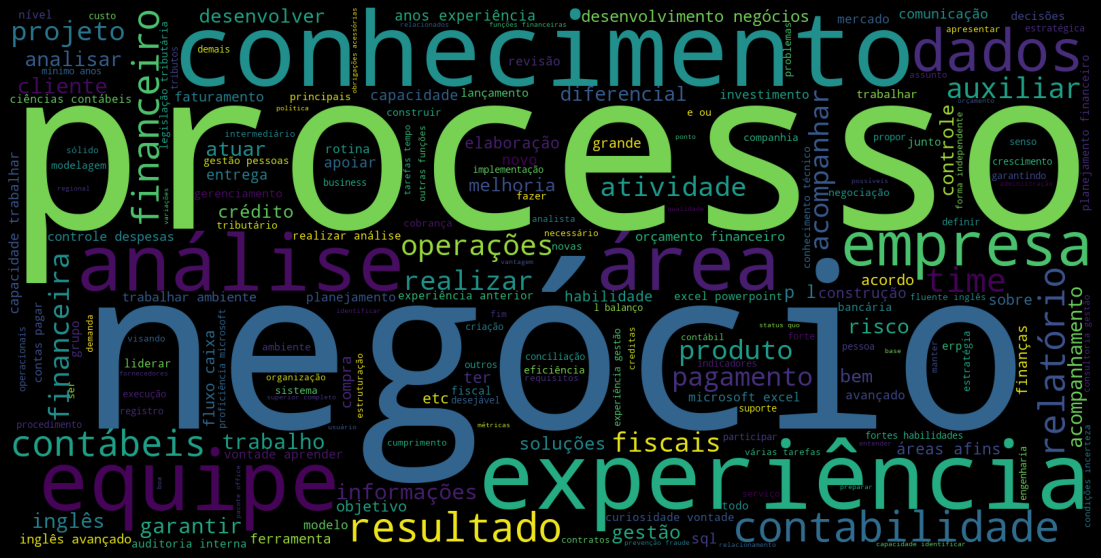

In [112]:
#Let's plot a WordCloud
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800, background_color="black").generate(all_jobs_text_no_sw)
plt.figure(figsize=(20,10),facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('wordcloud_all.png', facecolor='k', bbox_inches='tight')

In [113]:
#Function to return word frequency
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [114]:
#Now let's split all text without stopwords in words, counting it's frequency in the text
import cleantext
all_jobs_text_no_sw = str(" ".join(cleantext.clean_words(all_jobs_text_no_sw, all=False, extra_spaces=True, punct=True, stp_lang='portuguese')))
dict_words = word_count(all_jobs_text_no_sw)
df_words = pd.DataFrame.from_dict(dict_words, orient='index',
                       columns=['Palavra'])
df_words = df_words.reset_index()
df_words = df_words.sort_values(by='Palavra',ascending=False)
df_words.columns = ['Palavra','Frequência']

In [115]:
df_words.to_csv('all_words.csv',sep='|',encoding='UTF-16',index=False)

In [116]:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stopwords, ngram_range=(2,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(dframe['responsabilities_and_other_details'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [117]:
df_ngram.to_csv("bigram_trigram.csv",sep='|',encoding='UTF-16',index=False)

In [118]:
dframe.columns

Index(['company_name', 'job_area', 'job_link', 'job_extraction_timestamp',
       'job_title', 'job_location', 'job_main_responsabilities',
       'job_other_details', 'job_main_responsabilities_lang',
       'job_other_details_lang', 'job_main_responsabilities_pt',
       'job_other_details_pt', 'job_main_responsabilities_pt_processed',
       'job_other_details_pt_processed', 'job_title_type', 'Macro_job_area',
       'responsabilities_and_other_details', 'techskill_back_end_python',
       'techskill_back_end_python_qty', 'techskill_back_end_python_analytic',
       'techskill_data_science', 'techskill_data_science_qty',
       'techskill_data_science_analytic', 'techskill_databases',
       'techskill_databases_qty', 'techskill_databases_analytic',
       'techskill_devmetho', 'techskill_devmetho_qty',
       'techskill_devmetho_analytic', 'techskill_proj_manag',
       'techskill_proj_manag_qty', 'techskill_proj_manag_analytic',
       'techskill_tools', 'techskill_tools_qty', 'te